<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Visualisations/MC_vs_QMC_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of different MC and QMC point sets

### Mount Drive

In [1]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Define saving path (adjust if necessary):

In [2]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Comparison/'

### Imports

In [3]:
! pip install --upgrade pip # update pip to latest version
! pip install --upgrade scipy # update scipy to latest version
! pip install qmcpy --quiet

     |████████████████████████████████| 1.7 MB 31.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 38.2 MB 1.4 MB/s             
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 5.6 MB 36.4 MB/s            
  Preparing metadata (setup.py) ... done


In [4]:
import time
import numpy as np
from scipy.stats import uniform
from scipy.stats import qmc
import qmcpy 
import matplotlib.pyplot as plt

### Parameters

In [5]:
n = [ 2**j for j in range(4,20) ]       # sample size
m = [ j for j in range(4,20) ]          # exponent for powers of 2
s = 20                                   # dimensions
num = 1000                               # numbers of repetitions for MC and RQMC
seed = 3                                 # seed
runall = False                           # True: run all simulations, False: load saved simulations

## QMCPy - Sobol


In [6]:
# QMCPy - Sobol
if runall:
  times_qmcpy_sobol = np.zeros((len(n),num))
  for i in range(len(n)):
    for rep in range(num):
      start_qmcpy_sobol = time.time()
      qmcpy_sobol = qmcpy.Sobol(dimension=s, graycode=True, seed=seed).gen_samples(n[i])
      end_qmcpy_sobol = time.time()
      times_qmcpy_sobol[i,rep] = end_qmcpy_sobol - start_qmcpy_sobol

  print("QMCPy - Sobol:")    
  print(np.mean(times_qmcpy_sobol,axis=1))
  np.savez(path+"qmcpy_sobol_s%s.npz" %(s),times=times_qmcpy_sobol )

## QMCPy - Halton


In [7]:
# QMCPy - Halton

if runall:
  times_qmcpy_halton = np.zeros((len(n),num))
  for i in range(len(n)):
    for rep in range(num):
      start_qmcpy_halton = time.time()
      qmcpy_halton = qmcpy.Halton(dimension=s, seed=seed).gen_samples(n[i])
      end_qmcpy_halton = time.time()
      times_qmcpy_halton[i,rep] = end_qmcpy_halton - start_qmcpy_halton

  print("QMCPy - Halton:")    
  print(np.mean(times_qmcpy_halton,axis=1))
  np.savez(path+"qmcpy_halton_s%s.npz" %(s),times=times_qmcpy_halton)

## SciPy - Sobol

In [8]:
# SciPy - Sobol

if runall:
  times_scipy_sobol = np.zeros((len(n),num))
  for i in range(len(n)):
    for rep in range(num):
      start_scipy_sobol = time.time()
      sampler_scipy_sobol = qmc.Sobol(d=s, scramble=True, seed = seed)
      scipy_sobol = sampler_scipy_sobol.random_base2(m=m[i])
      end_scipy_sobol = time.time()
      times_scipy_sobol[i,rep] = end_scipy_sobol - start_scipy_sobol

  print("SciPy - Sobol:")    
  print(np.mean(times_scipy_sobol,axis=1))
  np.savez(path+"scipy_sobol_s%s.npz" %(s),times=times_scipy_sobol )

## SciPy - Halton

In [9]:
# SciPy - Halton

if runall:
  times_scipy_halton = np.zeros((len(n),num))
  for i in range(len(n)):
    for rep in range(num):
      start_scipy_halton = time.time()
      sampler_scipy_halton = qmc.Halton(d=s, scramble=True, seed = seed)
      scipy_halton = sampler_scipy_halton.random(n[i])
      end_scipy_halton = time.time()
      times_scipy_halton[i,rep] = end_scipy_halton - start_scipy_halton

  print("SciPy - Halton:")    
  print(np.mean(times_scipy_halton,axis=1))
  np.savez(path+"scipy_halton_s%s.npz" %(s),times=times_scipy_halton)

## NumPy - MC

In [10]:
# NumPy - MC

if runall:
  np.random.seed(seed)
  times_numpy_mc = np.zeros((len(n),num))
  for i in range(len(n)):
    for rep in range(num):
      start_numpy_mc = time.time()
      numpy_mc = np.random.rand(n[i],s)
      end_numpy_mc = time.time()
      times_numpy_mc[i,rep] = end_numpy_mc - start_numpy_mc

  print("NumPy - MC:")    
  print(np.mean(times_numpy_mc,axis=1))
  np.savez(path+"numpy_mc_s%s.npz" %(s),times=times_numpy_mc )

## Scipy - MC

In [11]:
# SciPy - MC

if runall:
  np.random.seed(seed)
  times_scipy_mc = np.zeros((len(n),num))
  for i in range(len(n)):
    for rep in range(num):
      start_scipy_mc = time.time()
      scipy_mc = uniform.rvs(size=(n[i],s))
      end_scipy_mc = time.time()
      times_scipy_mc[i,rep] = end_scipy_mc - start_scipy_mc

  print("SciPy - MC:")    
  print(np.mean(times_scipy_mc,axis=1))
  np.savez(path+"scipy_mc_s%s.npz" %(s),times=times_scipy_mc )

## Plot sample size against computational cost

In [12]:
if runall==False:
  times_qmcpy_sobol_s20 = np.load(path+'qmcpy_sobol_s20.npz')
  times_qmcpy_halton_s20 = np.load(path+'qmcpy_halton_s20.npz')
  times_scipy_sobol_s20 = np.load(path+'scipy_sobol_s20.npz')
  times_scipy_halton_s20 = np.load(path+'scipy_halton_s20.npz')
  times_numpy_mc_s20 = np.load(path+'numpy_mc_s20.npz')
  times_scipy_mc_s20 = np.load(path+'scipy_mc_s20.npz')

  times_qmcpy_sobol_s20 = times_qmcpy_sobol_s20['times']
  times_qmcpy_halton_s20 = times_qmcpy_halton_s20['times']
  times_scipy_sobol_s20 = times_scipy_sobol_s20['times']
  times_scipy_halton_s20 = times_scipy_halton_s20['times']
  times_numpy_mc_s20 = times_numpy_mc_s20['times']
  times_scipy_mc_s20 = times_scipy_mc_s20['times']

In [13]:
SMALL_SIZE = 26
MEDIUM_SIZE = 32
BIGGER_SIZE = 32

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

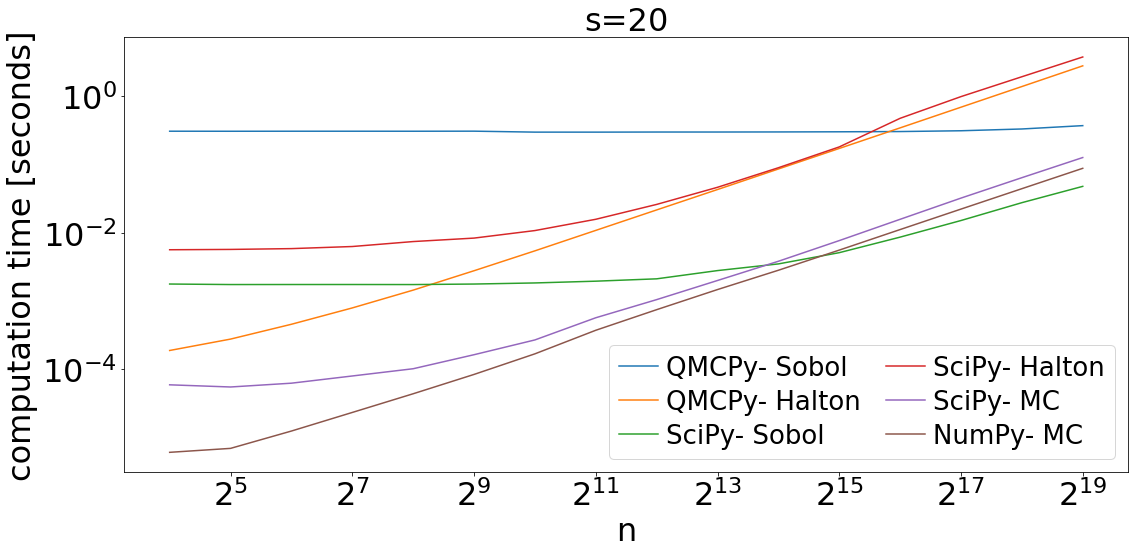

In [16]:
if runall==False:
  plt.figure(figsize=(18,8))
  cmap = plt.get_cmap("tab10")

  plt.plot(n, np.mean(times_qmcpy_sobol_s20,axis=1), label="QMCPy- Sobol", color=cmap(0))
  plt.plot(n, np.mean(times_qmcpy_halton_s20,axis=1), label="QMCPy- Halton", color=cmap(1))
  plt.plot(n, np.mean(times_scipy_sobol_s20,axis=1), label="SciPy- Sobol", color=cmap(2))
  plt.plot(n, np.mean(times_scipy_halton_s20,axis=1), label="SciPy- Halton", color=cmap(3))
  plt.plot(n, np.mean(times_scipy_mc_s20,axis=1), label="SciPy- MC", color=cmap(4))
  plt.plot(n, np.mean(times_numpy_mc_s20,axis=1), label="NumPy- MC", color=cmap(5))
  plt.title('s='+str(s))
  plt.xscale('log', basex=2)
  plt.xlabel('n')
  plt.yscale('log', basey=10)
  plt.ylabel('computation time [seconds]')
  plt.legend(loc='lower right', ncol=2,handlelength=1.5,labelspacing=0.3,handletextpad=0.3,columnspacing=1)

  plt.savefig('mc_vs_qmc_time_s20.png',bbox_inches = 'tight', pad_inches = .1)
  plt.show()